In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.qda import QDA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, roc_curve, auc  
from sklearn.metrics import classification_report  
from sklearn.cross_validation import train_test_split
%matplotlib inline  

### 1. 导入训练集

In [3]:
dbName = 'db.h5'
dfName = 'train'
df = pd.read_hdf(dbName, dfName)
len(df)

293288

### 2. 拆分成建模集和测试集

In [44]:
train, test = train_test_split(df, test_size=.5)
print 'len(train) = ', len(train)
print 'len(test) = ', len(test)

len(train) =  146644
len(test) =  146644


In [4]:
xcols = ['stat_view', 'stat_click', 'days', 'stat_view_1', 'stat_click_1', 'days_1', 'stat_view_2', 'stat_click_2', 'days_2']
ycol = 'praise'

### 2. 创建分类器

In [30]:
# classifier = QDA()
classifier = RandomForestClassifier(max_depth=6, n_estimators=10, max_features=4)
# classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
# classifier =DecisionTreeClassifier(max_depth=5)
#classifier = SVC(probability=True)   # ***慢 ***
#classifier = SVC(kernel="linear", C=0.025)
# classifier = SVC(gamma=2, C=1)
# classifier = KNeighborsClassifier(3)  # ***慢 ***
# classifier = AdaBoostClassifier()
# classifier = GaussianNB()
# classifier = LinearDiscriminantAnalysis()  # 暂无
#classifier = QuadraticDiscriminantAnalysis() # 暂无

### 3. 建模

In [51]:
train_x = train[xcols]
train_y = train[ycol]
test_x = test[xcols]

In [59]:
classifier.fit(train_x, train_y) 
proba = classifier.predict_proba(test_x)
result = train
result['pct1']  = proba[:,0]
result['pct2']  = proba[:,1]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
result['praise1'] = result['praise'].apply(lambda x: 1 if x == 1 else 0)
result['praise2'] = result['praise'].apply(lambda x: 1 if x == 2 else 0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [61]:
result = result[['dev_id', 'post_id', 'praise1', 'praise2', 'pct1', 'pct2']]
result1 = result[['dev_id', 'post_id', 'praise1', 'pct1']].sort_values('pct1', ascending=False)
result2 = result[['dev_id', 'post_id', 'praise2', 'pct2']].sort_values('pct2', ascending=False)

In [55]:
result1['n'] = range(1, len(result1)+1)
result1['cumsum'] =  result1['praise1'].cumsum() 

In [56]:
stat = result1['cumsum'] / result1['n']

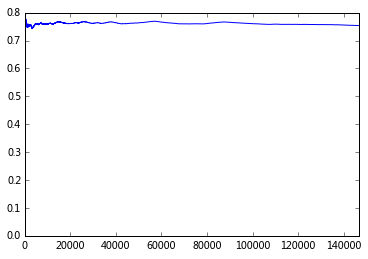

In [57]:
stat.reset_index(drop=True).plot()

In [162]:
result['praise1'].sum()

220987

In [163]:
result['praise2'].sum()

72301